In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.read_csv('dataset_spotify.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53787 entries, 0 to 53786
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        53787 non-null  int64  
 1   track_id          53787 non-null  object 
 2   artists           53787 non-null  object 
 3   album_name        53787 non-null  object 
 4   track_name        53786 non-null  object 
 5   popularity        53786 non-null  float64
 6   duration_ms       53786 non-null  float64
 7   explicit          53786 non-null  object 
 8   danceability      53786 non-null  float64
 9   energy            53786 non-null  float64
 10  key               53786 non-null  float64
 11  loudness          53786 non-null  float64
 12  mode              53786 non-null  float64
 13  speechiness       53786 non-null  float64
 14  acousticness      53786 non-null  float64
 15  instrumentalness  53786 non-null  float64
 16  liveness          53786 non-null  float6

**Список параметров датасета музыкальных треков:**

•  Unnamed: Порядковый номер строки (индекс).

•  id: Уникальный идентификатор трека на Spotify.

•  artists: Имена исполнителей.

•  album_name: Название альбома.

•  track_name: Название трека.

•  popularity: Показатель популярности (0-100).

•  duration_ms: Продолжительность в миллисекундах.

•  explicit: Наличие нецензурной лексики (True/False).

•  danceability: Пригодность для танцев (0-1).

•  energy: Энергичность трека (0-1).

•  key: Музыкальная тональность (0-11).

•  loudness: Громкость в децибелах.

•  mode: Л ад (0 - минор, 1 - мажор).

•  speechiness: Доля речи/речитатива (0-1).

•  acousticness: Вероятность акустического исполнения (0-1).

•  instrumentalness: Вероятность инструментального исполнения (0-1).

•  liveness: Вероятность живой записи (0-1).

•  valence: Позитивность/радостность трека (0-1).

•  tempo: Темп в BPM.

•  time_signature: Музыкальный размер.

•  track_genre: Жанр трека.

**Графики**

**График рейтинга песен**


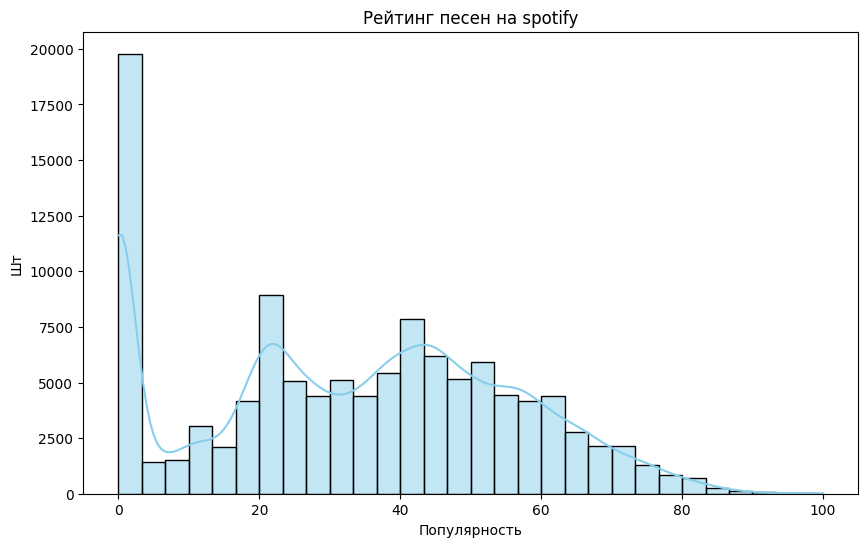

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color="skyblue")
plt.title("Рейтинг песен на spotify")
plt.xlabel("Популярность")
plt.ylabel("Шт")
plt.show()

Анализ гистограммы популярности песен показал нормальное распределение, с пиком в среднем диапазоне и небольшим количеством треков с очень высокой популярностью. Также наблюдается заметное количество песен с низкой популярностью. Для выявления факторов, влияющих на популярность, необходим дальнейший

**100 самых популярных треков**

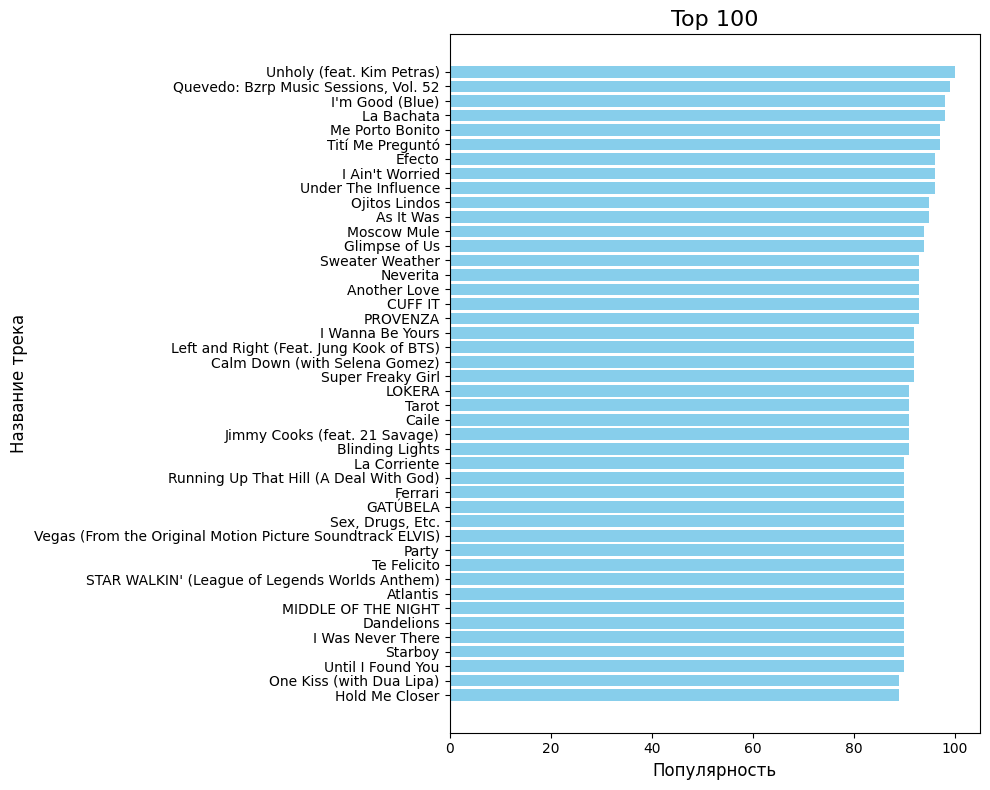

In [ ]:
import matplotlib.pyplot as plt
top_100_tracks = df.sort_values(by='popularity', ascending=False).head(100)
plt.figure(figsize=(10, 8))
plt.barh(top_100_tracks['track_name'], top_100_tracks['popularity'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 100', fontsize=16)
plt.xlabel('Популярность', fontsize=12)
plt.ylabel('Название трека', fontsize=12)
plt.tight_layout()
plt.show()

**График распределения жанров музыки по популярности**

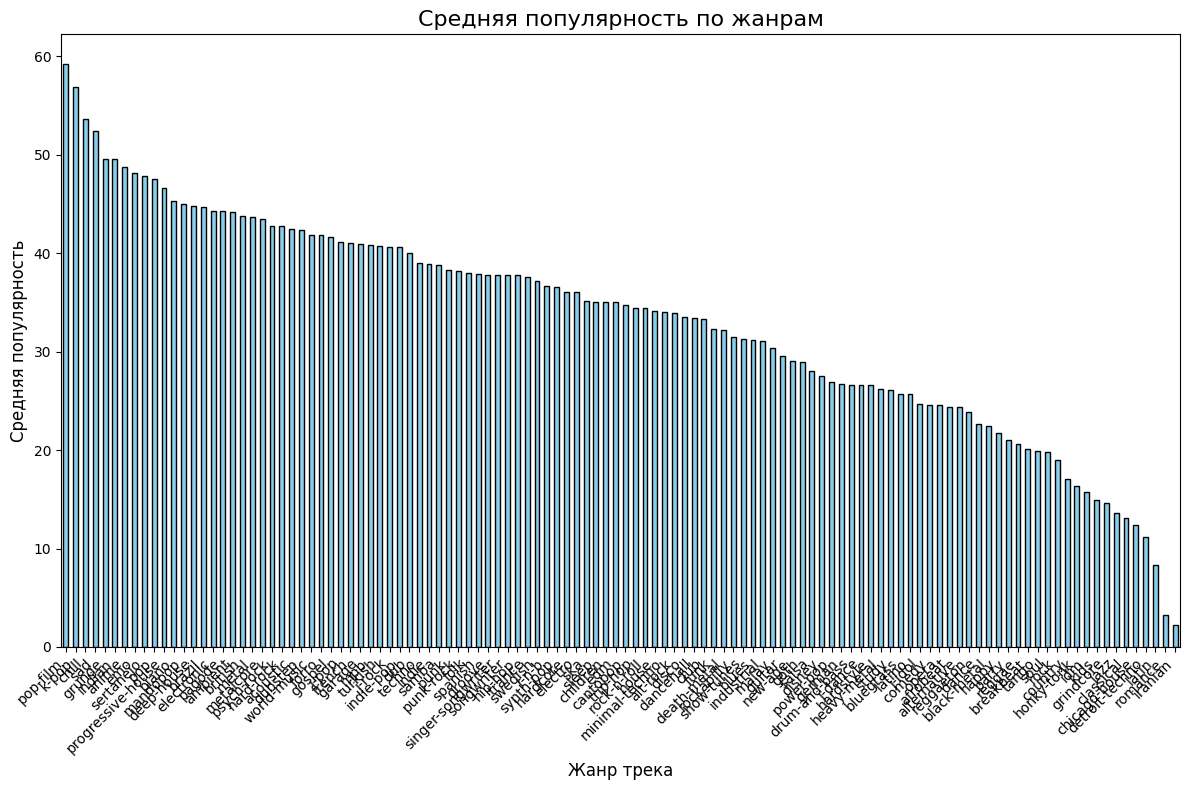

In [ ]:
import seaborn as sns
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Фильтруем жанры с достаточным количеством записей
genre_counts = df['track_genre'].value_counts()
filtered_genres = genre_counts[genre_counts > 100].index  # Жанры с >100 треков
filtered_genre_popularity = genre_popularity[genre_popularity.index.isin(filtered_genres)]
plt.figure(figsize=(12, 8))
filtered_genre_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Средняя популярность по жанрам', fontsize=16)
plt.xlabel('Жанр трека', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**График распределения продолжительности треков**

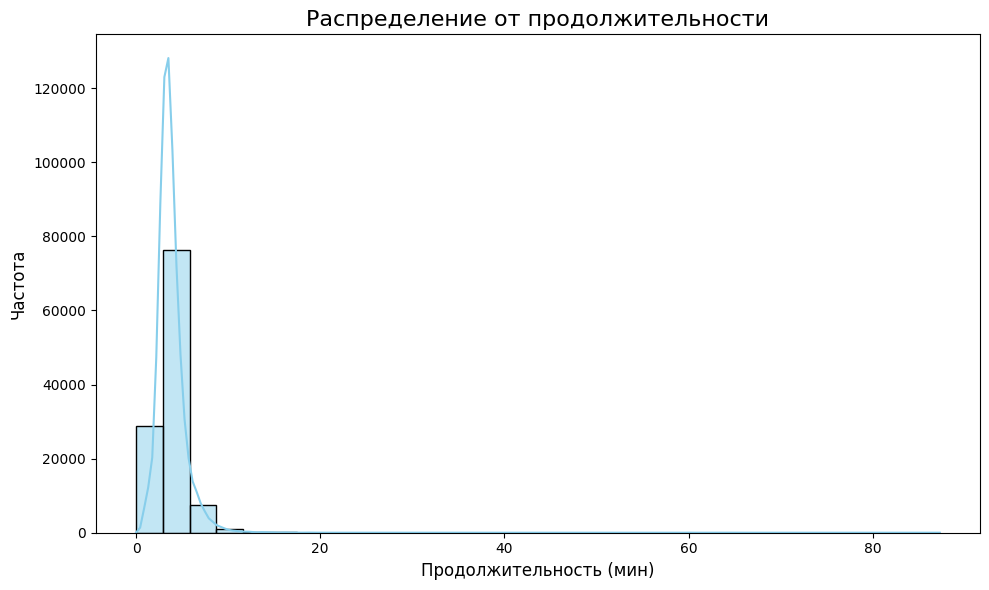

In [ ]:
# Преобразуем продолжительность треков из миллисекунд в минуты
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=30, kde=True, color='skyblue')
plt.title('Распределение от продолжительности', fontsize=16)
plt.xlabel('Продолжительность (мин)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.tight_layout()
plt.show()

**График популярности трека от его продолжительности**

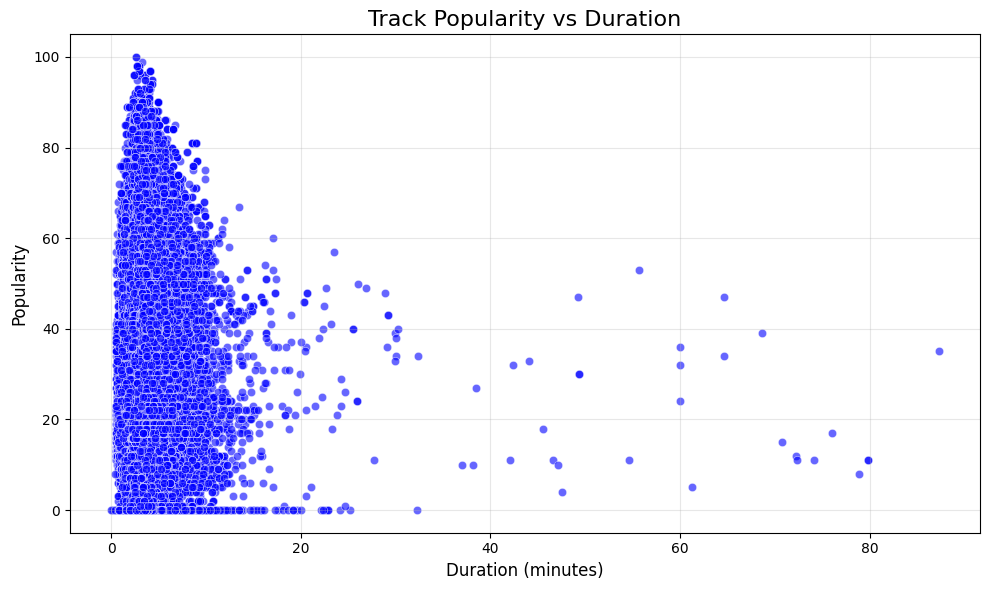

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='duration_min',
    y='popularity',
    alpha=0.6,
    color='blue'
)
plt.title('Зависимость популярности от продолжительности', fontsize=16)
plt.xlabel('Продолжительность (мин)', fontsize=12)
plt.ylabel('Популярность', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



**Зависимость популярности от жанра трека**

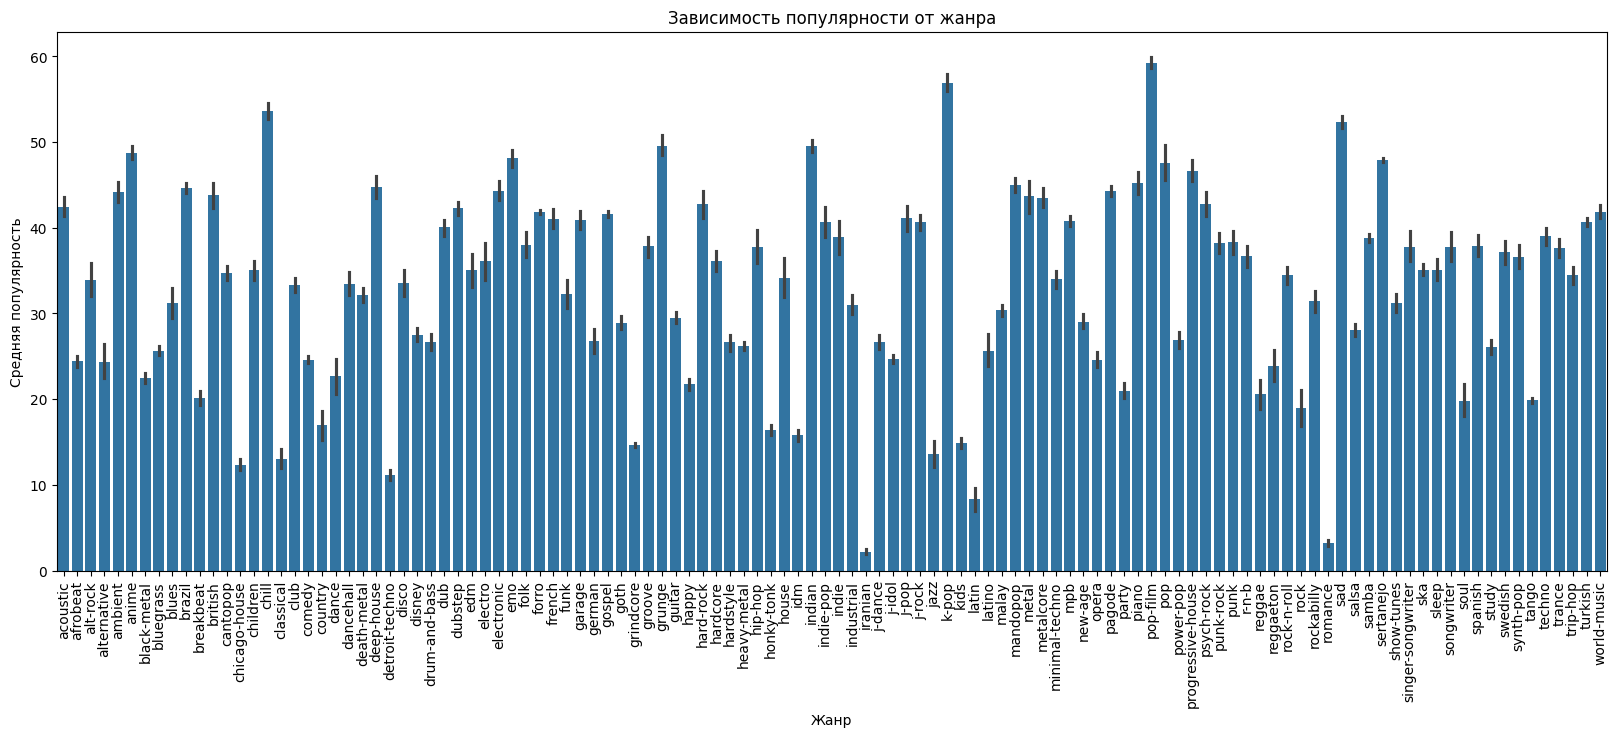

In [50]:
plt.figure(figsize=(20,7))
sns.barplot(x='track_genre', y='popularity', data=df)
plt.title('Зависимость популярности от жанра')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)
plt.show()

Популярность заметно зависит от жанра трека, необходимо преобразовывать данные перед использованием для модели

# Построение модели

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [27]:
df = pd.read_csv('dataset_spotify.csv')

In [ ]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Убираем дубликаты

In [28]:
df.value_counts('track_id')

,count
track_id,
6S3JlDAGk3uu3NtZbPnuhS,9
2kkvB3RNRzwjFdGhaUA0tz,8
2Ey6v4Sekh3Z0RUSISRosD,8
4GPQDyw9hC1DiZVh0ouDVL,7
61202Zzk9rk4bPMZLh2gr6,7
...,...
2rHfLANXNn5ppnW0jqv8h2,1
2rHX2oJ6sy9knGTBge4A3E,1
2rHJDOPLTw7w5NqrTg3iBb,1


In [29]:
df = df.drop_duplicates('track_id')

Напишем модель для **предсказания популярности трека** по его характеристикам:

*Целевая переменная* - popularity

*Признаки*: duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre.

Для этого надо провести обработку данных перед написанию модели.

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Проверка и обработка пропусков в 'explicit'
if df['explicit'].isnull().any():
    df['explicit'] = df['explicit'].fillna(0).astype(int)  # Заменяем пропуски на 0

# Продолжение обработки
df['duration_minutes'] = df['duration_ms'] / 60000


# Создание новых признаков
df['liveness_acousticness'] = 2 * df['liveness'] * df['acousticness'] / (df['liveness'] + df['acousticness'])  # Взаимодействие ливнеса и акустичности
df['danceability_energy'] = 2 * df['danceability'] * df['energy'] / (df['danceability'] + df['energy'])  # Взаимодействие танцевальности и энергичности

# Нормализация громкости
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())

# Новая переменная: сочетание громкости и энергии
df['loudness_energy'] = (df['loudness_normalized'] + df['energy']) / 2

# Классификация темпа
df['tempo_category'] = pd.cut(df['tempo'], bins=[df['tempo'].min(), 90, 140, df['tempo'].max()], labels=['Slow', 'Medium', 'Fast'])
df['tempo_category'] = le.fit_transform(df['tempo_category'])  # Преобразуем категориальные значения в числовые

# Преобразуем жанр трека в числовой формат
df['track_genre_int'] = le.fit_transform(df['track_genre'])

# Дополнительные новые признаки
df['energy_danceability'] = df['energy'] * df['danceability']  # Взаимодействие энергичности и танцевальности
df['acousticness_instrumentalness'] = df['acousticness'] * df['instrumentalness']  # Взаимодействие акустичности и инструментальности
df['speechiness_liveness'] = df['speechiness'] * df['liveness']  # Взаимодействие речи и живой записи

# Заменяем бесконечности на NaN
df['mode'] = df['mode'].replace([float('inf'), float('-inf')], float('nan'))
# Заполняем пропуски значением 0 (или любым другим значением)
df['mode'] = df['mode'].fillna(0).astype(int)

if df['key'].isnull().any():
    df['key'] = df['key'].fillna(0).astype(int)

# Признаки для модели
X = df[['duration_minutes', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'time_signature', 'liveness_acousticness', 'danceability_energy', 'loudness_energy',
        'tempo_category', 'energy_danceability', 'acousticness_instrumentalness', 'speechiness_liveness']]

# Целевая переменная для жанра
y = df['track_genre_int']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     89741 non-null  int64  
 1   track_id                       89741 non-null  object 
 2   artists                        89740 non-null  object 
 3   album_name                     89740 non-null  object 
 4   track_name                     89740 non-null  object 
 5   popularity                     89741 non-null  int64  
 6   duration_ms                    89741 non-null  int64  
 7   explicit                       89741 non-null  bool   
 8   danceability                   89741 non-null  float64
 9   energy                         89741 non-null  float64
 10  key                            89741 non-null  int64  
 11  loudness                       89741 non-null  float64
 12  mode                           89741 non-null  int

Убираем ненужные колонки

In [32]:
df = df.drop(['track_name', 'album_name', 'artists', 'track_id', 'Unnamed: 0', 'tempo', 'time_signature', 'key', 'mode', 'loudness_normalized', 'track_genre'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_ms                    89741 non-null  int64  
 1   explicit                       89741 non-null  bool   
 2   danceability                   89741 non-null  float64
 3   energy                         89741 non-null  float64
 4   key                            89741 non-null  int64  
 5   loudness                       89741 non-null  float64
 6   mode                           89741 non-null  int64  
 7   speechiness                    89741 non-null  float64
 8   acousticness                   89741 non-null  float64
 9   instrumentalness               89741 non-null  float64
 10  liveness                       89741 non-null  float64
 11  valence                        89741 non-null  float64
 12  tempo                          89741 non-null  flo

Проверяем на нулевые значения и убираем их

In [33]:
df.isnull().sum()

,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


In [34]:
df = df.dropna()

# Создание модели

In [37]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
pip install scikeras


Фолд 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE на проверочной выборке для фолда 1: 355.26091101050105

Фолд 2...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE на проверочной выборке для фолда 2: 357.49698170262326

Фолд 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE на проверочной выборке для фолда 3: 360.5883515050175

Фолд 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE на проверочной выборке для фолда 4: 357.1680884507853

Фолд 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE на проверочной выборке для фолда 5: 360.54052182240343


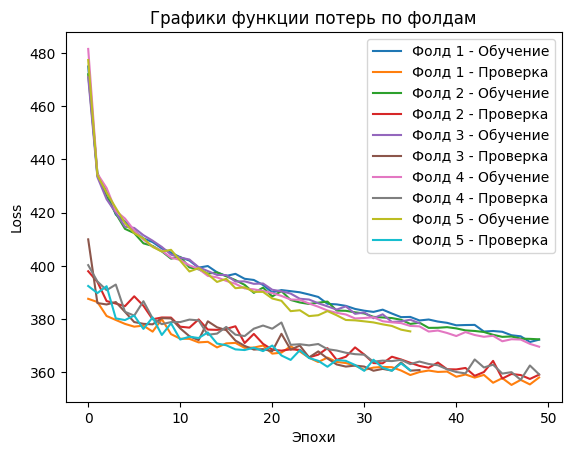

In [38]:

# Разделение X и y
X = df.drop('popularity', axis=1)
y = df['popularity']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Настройка кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

# Сохранение ошибок для каждого фолда
train_losses = []
val_losses = []

for train_index, val_index in kf.split(X):
    print(f"\nФолд {fold}...")

    # Разделение данных на обучающую и проверочную выборки
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Создание модели
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Nadam(learning_rate=0.001), loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Обучение модели
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=64,
        callbacks=[early_stop],
        verbose=0
    )

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Оценка модели
    val_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, val_pred)
    print(f"MSE на проверочной выборке для фолда {fold}: {mse}")

    fold += 1

# Построение графиков для всех фолдов
for i in range(len(train_losses)):
    plt.plot(train_losses[i], label=f'Фолд {i+1} - Обучение')
    plt.plot(val_losses[i], label=f'Фолд {i+1} - Проверка')

plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.title('Графики функции потерь по фолдам')
plt.show()


- MSE для фолдов варьируется в диапазоне от 355.26 до 360.59, что говорит о некотором разбросе в производительности модели на разных частях данных.

- MSE для фолдов 1 и 2 ниже, это может указывать на более легкое предсказания для этих частей данных.

- Фолды 3, 4 и 5 показывают несколько более высокие значения, что может быть признаком того, что модель сложнее предсказывает на этих данных.

- Разница между наименьшим и наибольшим значением MSE составляет около 5 единиц, что не является большой вариацией. Это может означать, что модель в целом устойчиво работает на разных подвыборках, что хорошо с точки зрения общей производительности.

**Общий вывод:** Модель стабильно обучается на всех фолдах, но можно сделать вывод, что есть определенная сложность в предсказании значений, которые дают наибольшее значение MSE (фолды 3-5)


## **Оцениваем производительность текущей модели**

In [40]:
y_pred = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

2244/2244 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
MAE: 14.909166360262748
RMSE: 18.872847305463605


В среднем абсолютная ошибка предсказаний составляет приблизительно 14.91 единиц, а среднеквадратичная ошибка — 18.87 единиц.

561/561 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
561/561 ━━━━━━━━

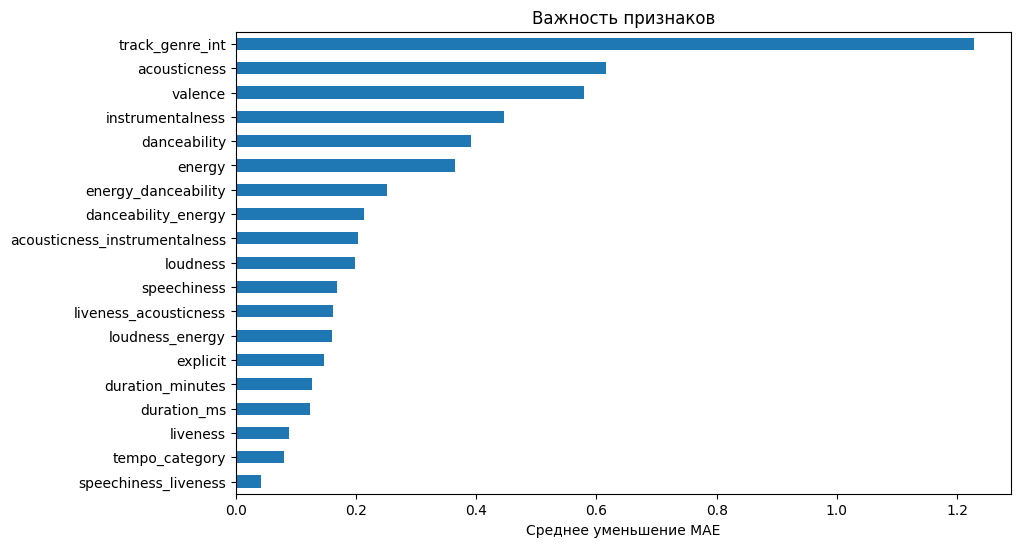

In [42]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

importances = pd.Series(result.importances_mean, index=df.drop('popularity', axis=1).columns)

importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Наиболее информативные признаки для модели - track_genre и acousticiness, что логично для предсказания популярности

## Перейдем к тестированию остальных семейств моделей

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_val)

train_loss = mean_squared_error(y_train, y_pred_train)
val_loss = mean_squared_error(y_val, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {val_loss}")

mae = mean_absolute_error(y_val, y_pred_test)
mse = mean_squared_error(y_val, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Тренировочные потери: 403.785212631743
Тестовые потери: 401.7704507806369
MAE: 16.418344924195786
MSE: 401.7704507806369
RMSE: 20.044212401105636


- Показала сравнительно высокие потери как на тренировочных, так и на тестовых данных. Разница между ними невелика, что говорит об отсутствии сильного переобучения. Однако, точность невысока.
- Метрики также указывают на относительно высокую ошибку предсказания


In [45]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_val)

train_loss = mean_squared_error(y_train, y_pred_train)
val_loss = mean_squared_error(y_val, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {val_loss}")

mae = mean_absolute_error(y_val, y_pred_test)
mse = mean_squared_error(y_val, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


Тренировочные потери: 291.8677258390965
Тестовые потери: 314.71265129248
MAE: 13.151045431042816
MSE: 314.71265129248
RMSE: 17.74014236956626


- Довольно хорошие показатели на тренировочном наборе, но заметное ухудшение на тестовом, что свидетельствует о переобучении. Несмотря на переобучение, точность лучше чем у линейной регрессии.
- Метрики показывают, что модель в целом дает более точные прогнозы.

In [47]:
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16, 1), activation='relu', solver='adam', max_iter=200, random_state=42, early_stopping=True)
mlp_model.fit(X_train, y_train)

y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_val)

train_loss = mean_squared_error(y_train, y_pred_train)
val_loss = mean_squared_error(y_val, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {val_loss}")

mae = mean_absolute_error(y_val, y_pred_test)
mse = mean_squared_error(y_val, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Тренировочные потери: 327.9548286827029
Тестовые потери: 347.0707297401593
MAE: 14.350368862869733
MSE: 347.0707297401593
RMSE: 18.629834399160917


-  Показатели на тренировочных и тестовых данных достаточно близки, переобучения нет. Точность находится между линейной регрессией и градиентным бустингом. Однако потери выше, чем у DecisionTreeRegressor и GradientBoostingRegressor, что говорит о более слабой обучаемости модели
- Метрики также указывают на то, что модель хуже справляется с набором данных

In [46]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_val)

train_loss = mean_squared_error(y_train, y_pred_train)
val_loss = mean_squared_error(y_val, y_pred_test)

print(f"Тренировочные потери: {train_loss}")
print(f"Тестовые потери: {val_loss}")

mae = mean_absolute_error(y_val, y_pred_test)
mse = mean_squared_error(y_val, y_pred_test)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Тренировочные потери: 270.66458290231407
Тестовые потери: 283.7461540143003
MAE: 12.620553098293884
MSE: 283.7461540143003
RMSE: 16.84476636864698


- Самые низкие потери относительно предыдущих моделей
- Метрики подтверждают, что модель работает с наименьшими ошибками среди всех моделей. Это также указывает на хорошее качество предсказаний.

**Общий вывод**: GradientBoostingRegressor показывает лучшие результаты, демонстрируя наименьшие потери и наибольшую точность на тестовых данных при отсутствии значительного переобучения. Наша написанная модель с кросс-валидацией имеет хорошие результаты, но GradientBoostingRegressor представляет собой более эффективное решение в данном случае. DecisionTreeRegressor склонен к переобучению, а LinearRegression показывает недостаточную точность. MLPRegressor имеет средние показатели.